In [1]:
## Import thư viện
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

Nhập tên file ảnh muốn mở: picture.jpg


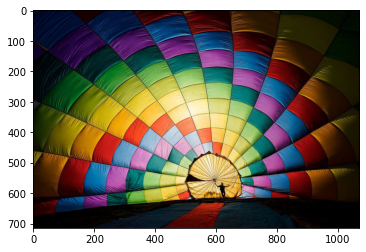

In [2]:
## Đọc ảnh và hiển thị ảnh
file_name = input("Nhập tên file ảnh muốn mở: ") # Có 2 file ảnh gốc là: "Landscape.jpg" và "picture.jpg".
raw_img = Image.open('./' + file_name)
plt.imshow(raw_img)
img = np.array(raw_img)
#Lấy chiều cao, chiều dài của ảnh
heightImg, widthImg = img.shape[0], img.shape[1]
#Reshape lại hình ảnh từ một scalar 3 chiều thành mảng 2 chiều
img = img.reshape( heightImg*widthImg, img.shape[2])

In [3]:
#So sánh 2 mảng
def checkArrayEqual(arr1, arr2):
    return np.array_equiv(arr1,arr2)
    

In [4]:
#Tìm bộ centroids mới
def findNewCentroids(max_iter,img_1d, centroids, k_clusters):

    for i in range(max_iter):
        d = np.linalg.norm(img_1d - centroids[: , np.newaxis] , axis = 2)
        labels = np.argmin(d , axis = 0)
        
        #Cập nhật giá trị trung bình
        averages = []
        for k in range(k_clusters):
            averages.append(img_1d[labels == k].mean(axis = 0))
        averages = np.array(averages)
        old_centroid = centroids
        for i in range(k_clusters):
          if len(averages[i]) != 0:
            centroids[i] = averages[i]
            
        if(checkArrayEqual(old_centroid, centroids)):
            break
    return labels
        

In [5]:
def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):

    # Khởi tạo k cluster từ trên ảnh
    if init_centroids == 'in_pixels':
        centroids = img_1d[np.random.choice(img_1d.shape[0] , size = k_clusters , replace = False)]
    # Khởi tạo k cluster random
    elif init_centroids == 'random':
        centroids = np.random.randint(0,255,size=(k_clusters,img_1d.shape[1]))
        
    #Tìm bộ centroids mới
    labels = findNewCentroids(max_iter, img_1d, centroids, k_clusters)
    return centroids, labels

In [6]:
def saveImage(test_img):
    img_type = input("Nhập định dạng file ảnh muốn lưu: ") # định dạng "pdf" hoặc định dạng "jpg, png".
    if (img_type == "pdf"):
        save_img = Image.fromarray(test_img)
        file_name = input("Nhập tên file ảnh muốn lưu: ")
        save_img = save_img.convert('RGB')
        save_img.save('./' + file_name + '.pdf')
        print("Ảnh đã được lưu!")
    
    elif (img_type == "jpg"):
        save_img = Image.fromarray(test_img)
        file_name = input("Nhập tên file ảnh muốn lưu: ")
        save_img.save('./' + file_name + '.jpg')
        print("Ảnh đã được lưu!")
        
        
    elif (img_type == "png"):
        save_img = Image.fromarray(test_img)
        file_name = input("Nhập tên file ảnh muốn lưu: ")
        save_img.save('./' + file_name + '.png')
        print("Ảnh đã được lưu!")
        
    else: 
        print("Định dạng không chính xác!")

In [7]:
def main():
    
    k_cluster = int(input("Nhập số màu ảnh: "))
    test_img = img.copy()
    init_centroids = input("Nhập cách khởi tạo centroid: ") #Hai cách khởi tạo: in_pixels hoặc random
    
    centroids, labels = kmeans(test_img,k_cluster,10, init_centroids)

    ## Gắn lại label cho ảnh
    for k in range(centroids.shape[0]):
      test_img[labels == k] = centroids[k]
  
    test_img = test_img.astype("uint8")
    test_img = test_img.reshape(heightImg, widthImg  , 3)
    plt.imshow(test_img)
    saveImage(test_img)
    
    

Nhập số màu ảnh: 3
Nhập cách khởi tạo centroid: random
Nhập định dạng file ảnh muốn lưu: pdf
Nhập tên file ảnh muốn lưu: picture3pdf
Ảnh đã được lưu!


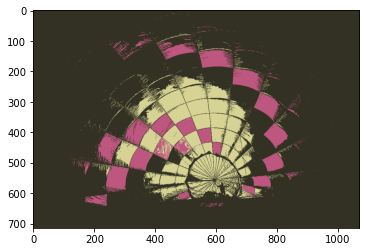

In [8]:
main()